In [1]:
import pickle
def pickling(file,path):
    pickle.dump(file,open(path,'wb'))
def unpickling(path):
    file_return=pickle.load(open(path,'rb'))
    return file_return
import comet_ml

from las_model import Speller, Transformer_Listener, Conv_GRU_Listener, Listener
from las_utils import CreateOnehotVariable, batch_iterator_2preds

import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import itertools
import pandas as pd
from scipy.interpolate import CubicSpline

In [2]:
import numpy as np
import pandas as pd
import pickle
def pickling(file,path):
    pickle.dump(file,open(path,'wb'))
def unpickling(path):
    file_return=pickle.load(open(path,'rb'))
    return file_return
from scipy.special import softmax
from typing import List

In [3]:
folds_dict = unpickling('transformed_data_four_fold_dict.p')

In [4]:
folds_dict

{'fold_1': ['s46', 's45', 's36', 's11', 's19', 's20', 's2', 's22'],
 'fold_2': ['s7', 's32', 's25', 's35', 's5', 's10', 's3', 's43'],
 'fold_3': ['s13', 's16', 's12', 's6', 's40', 's18', 's28', 's23'],
 'fold_4': ['s41', 's48', 's1', 's24', 's27', 's8', 's30', 's9', 's33']}

In [5]:
# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_1/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_2/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_3/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_4/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_test_window_predictions_with_prob.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_1/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400//fold_1/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400//fold_1/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')

pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400//fold_1/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_4.p')
pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_4.p')
pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_4.p')
pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_4.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400/fold_1/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400_test_window_predictions_with_prob_3.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2/fold_1/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2_test_window_predictions_with_prob_2.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2/fold_2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2_test_window_predictions_with_prob_2.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2/fold_3/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2_test_window_predictions_with_prob_2.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2/fold_4/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2_test_window_predictions_with_prob_2.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2/fold_1/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_2.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2/fold_2/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_2.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2/fold_3/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_2.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2/fold_4/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_2.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2/fold_1/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_3.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2/fold_2/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_3.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2/fold_3/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_3.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2/fold_4/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2_test_window_predictions_with_prob_3.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_1/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400//fold_1/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob.p')

# pred_dict_f1 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400//fold_1/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob_2.p')
# pred_dict_f2 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob_2.p')
# pred_dict_f3 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_3/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob_2.p')
# pred_dict_f4 = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/fold_4/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_window_predictions_with_prob_2.p')

In [6]:
# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_test_ensemble_window_predictions_with_prob.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/2pred_gru_rl3_2048_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_ensemble_window_predictions_with_prob.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_ensemble_window_predictions_with_prob.p')
# 
# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_ensemble_window_predictions_with_prob_3.p')

ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_test_ensemble_window_predictions_with_prob_4.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400/2pred_gru_rl3_3072_noflabels_no_attn_wcontext_ft_win_400_test_ensemble_window_predictions_with_prob_.3p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_try2_test_ensemble_window_predictions_with_prob_2.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2/asrf_sfprob_acc_2pred_gru_rl3_1024_dlrs2_add_aug_wcontext_d2_win_600_2_test_ensemble_window_predictions_with_prob_2.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2/asrf_sfprob_acc2_2pred_gru_rl3_256_dlrs2_add_aug_wcontext_d2_win_600_2_test_ensemble_window_predictions_with_prob_3.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_ensemble_window_predictions_with_prob.p')

# ensemble_pred_dict = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400/2pred_gru_rl3_3072_dlrs2_subset_hc_0.6_add_syn_data_new_label_no_attn_wcontext_ft_win_400_severe_ensemble_window_predictions_with_prob_2.p')

In [7]:
ensemble_pred_dict.keys()

dict_keys(['window_pred', 'window_prob', 'window_gt', 'f_pred', 'f_prob', 'f_gt', 'window_sub', 'window_act', 'window_rep', 'attention_scores', 'input_lens', 'label_lens'])

In [8]:
pred_dict_f1.keys()

dict_keys(['window_pred', 'window_prob', 'window_gt', 'f_pred', 'f_prob', 'f_gt', 'window_sub', 'window_act', 'window_rep', 'attention_scores', 'input_lens', 'label_lens'])

In [9]:
pred_dict_f1['window_prob'][11].shape

(1, 7, 6)

In [10]:
pred_dict_f2['window_prob'][11].shape

(1, 7, 6)

In [11]:
pred_dict_f1['window_prob'][0].shape

(1, 7, 6)

In [12]:
pred_dict_f1['window_prob'] = [softmax(i,axis=2) for i in pred_dict_f1['window_prob']]
pred_dict_f2['window_prob'] = [softmax(i,axis=2) for i in pred_dict_f2['window_prob']]
pred_dict_f3['window_prob'] = [softmax(i,axis=2) for i in pred_dict_f3['window_prob']]
pred_dict_f4['window_prob'] = [softmax(i,axis=2) for i in pred_dict_f4['window_prob']]

In [13]:
ensembled_pred = []
for i in range(len(pred_dict_f1['window_prob'])):
    avg_pred = (pred_dict_f1['window_prob'][i]+pred_dict_f2['window_prob'][i]+pred_dict_f3['window_prob'][i]+pred_dict_f4['window_prob'][i])/4
    ensembled_pred.append(avg_pred)

In [14]:
np.argmax(ensembled_pred[4][0],axis = 0).astype(str)

array(['5', '3', '1', '0', '0', '0'], dtype='<U21')

In [15]:
pred_dict_f1['window_pred'][0]

['424']

In [16]:
pred_dict_f1['window_pred'][0]

['424']

In [17]:
pred_dict_f1['window_gt'][2]

['312']

In [18]:
np.argmax(pred_dict_f1['window_prob'][1][0], axis = 0).astype(str)

array(['2', '4', '3', '6', '0', '0'], dtype='<U21')

In [19]:
# pred_dict_f1['window_sub'] = [i[0].split('/')[-1] for i in pred_dict_f1['window_sub']]
# pred_dict_f1['window_act'] = np.concatenate(pred_dict_f1['window_act'])
# pred_dict_f1['window_sub'] = np.array(pred_dict_f1['window_sub'])
# pred_dict_f1['window_rep'] = np.concatenate(pred_dict_f1['window_rep'])

ensemble_pred_dict['window_sub'] = [i[0].split('/')[-1] for i in ensemble_pred_dict['window_sub']]
ensemble_pred_dict['window_act'] = np.concatenate(ensemble_pred_dict['window_act'])
ensemble_pred_dict['window_sub'] = np.array(ensemble_pred_dict['window_sub'])
ensemble_pred_dict['window_rep'] = np.concatenate(ensemble_pred_dict['window_rep'])

In [20]:
ensemble_pred_dict['window_rep']

array(['1', '1', '1', ..., '5', '5', '5'], dtype='<U1')

In [21]:
ensemble_pred_dict['combined'] = [i+'_'+j+'_'+k for i,j,k in zip(ensemble_pred_dict['window_sub'],ensemble_pred_dict['window_act'],ensemble_pred_dict['window_rep'])]

In [22]:
# len(pred_dict_f1['combined'])
len(ensemble_pred_dict['combined'])

4110

In [23]:
# df = pd.DataFrame({'comb':pred_dict_f1['combined']})
# df["isStatusChanged"] = df["comb"].shift(1, fill_value=df["comb"].head(1)) != df["comb"]
# idx_start_and_end = np.append(np.insert(np.where(df['isStatusChanged'] == 1)[0],0,0),df.shape[0])

df = pd.DataFrame({'comb':ensemble_pred_dict['combined']})
df["isStatusChanged"] = df["comb"].shift(1, fill_value=df["comb"].head(1)) != df["comb"]
idx_start_and_end = np.append(np.insert(np.where(df['isStatusChanged'] == 1)[0],0,0),df.shape[0])

In [24]:
for i in list(df['comb']):
    if 's26_gla' in i:
        print(i)

s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l
s26_glasses_l


In [25]:
len(idx_start_and_end)-1

329

In [26]:
def get_labels_start_end_time(frame_wise_labels, bg_class=["background"]):
    labels = []
    starts = []
    ends = []
    last_label = frame_wise_labels[0]
    if frame_wise_labels[0] not in bg_class:
        labels.append(frame_wise_labels[0])
        starts.append(0)
    for i in range(len(frame_wise_labels)):
        if frame_wise_labels[i] != last_label:
            if frame_wise_labels[i] not in bg_class:
                labels.append(frame_wise_labels[i])
                starts.append(i)
            if last_label not in bg_class:
                ends.append(i)
            last_label = frame_wise_labels[i]
    if last_label not in bg_class:
        ends.append(i + 1)
    return labels, starts, ends

def removeDuplicates(S):
    S = list(S.rstrip())
    n = len(S)   
    if (n < 2) : 
        return S  
    j = 0
    for i in range(n):    
        if (S[j] != S[i]): 
            j += 1
            S[j] = S[i]   
    j += 1
    S = S[:j] 
    return ''.join(S)

def levenstein(p, y, norm=False):
    m_row = len(p)    
    n_col = len(y)
    D = np.zeros([m_row+1, n_col+1], np.float)
    for i in range(m_row+1):
        D[i, 0] = i
    for i in range(n_col+1):
        D[0, i] = i

    for j in range(1, n_col+1):
        for i in range(1, m_row+1):
            if y[j-1] == p[i-1]:
                D[i, j] = D[i-1, j-1]
            else:
                D[i, j] = min(D[i-1, j] + 1,
                              D[i, j-1] + 1,
                              D[i-1, j-1] + 1)
    
    if norm:
        score = (1 - D[-1, -1]/max(m_row, n_col)) * 100
    else:
        score = D[-1, -1]

    return score

def _levenshtein_distance(ref, hyp):
    """Levenshtein distance is a string metric for measuring the difference
    between two sequences. Informally, the levenshtein disctance is defined as
    the minimum number of single-character edits (substitutions, insertions or
    deletions) required to change one word into the other. We can naturally
    extend the edits to word level when calculate levenshtein disctance for
    two sentences.
    """
    m = len(ref)
    n = len(hyp)

    # special case
    if ref == hyp:
        return 0
    if m == 0:
        return n
    if n == 0:
        return m

    if m < n:
        ref, hyp = hyp, ref
        m, n = n, m

    # use O(min(m, n)) space
    distance = np.zeros((2, n + 1), dtype=np.int32)

    # initialize distance matrix
    for j in range(0,n + 1):
        distance[0][j] = j

    # calculate levenshtein distance
    for i in range(1, m + 1):
        prev_row_idx = (i - 1) % 2
        cur_row_idx = i % 2
        distance[cur_row_idx][0] = i
        for j in range(1, n + 1):
            if ref[i - 1] == hyp[j - 1]:
                distance[cur_row_idx][j] = distance[prev_row_idx][j - 1]
            else:
                s_num = distance[prev_row_idx][j - 1] + 1
                i_num = distance[cur_row_idx][j - 1] + 1
                d_num = distance[prev_row_idx][j] + 1
                distance[cur_row_idx][j] = min(s_num, i_num, d_num)
#                 distance[cur_row_idx][j] = min(i_num, d_num)

    return distance[m % 2][n]

def char_errors(reference, hypothesis, ignore_case=False, remove_space=False):
    """Compute the levenshtein distance between reference sequence and
    hypothesis sequence in char-level.
    :param reference: The reference sentence.
    :type reference: basestring
    :param hypothesis: The hypothesis sentence.
    :type hypothesis: basestring
    :param ignore_case: Whether case-sensitive or not.
    :type ignore_case: bool
    :param remove_space: Whether remove internal space characters
    :type remove_space: bool
    :return: Levenshtein distance and length of reference sentence.
    :rtype: list
    """
    if ignore_case == True:
        reference = reference.lower()
        hypothesis = hypothesis.lower()

    join_char = ' '
    if remove_space == True:
        join_char = ''

    reference = join_char.join(filter(None, reference.split(' ')))
    hypothesis = join_char.join(filter(None, hypothesis.split(' ')))

    edit_distance = _levenshtein_distance(reference, hypothesis)
    return float(edit_distance), len(reference)

def cer(reference, hypothesis, ignore_case=False, remove_space=False):
    """Calculate charactor error rate (CER). CER compares reference text and
    hypothesis text in char-level. CER is defined as:
    .. math::
        CER = (Sc + Dc + Ic) / Nc
    where
    .. code-block:: text
        Sc is the number of characters substituted,
        Dc is the number of characters deleted,
        Ic is the number of characters inserted
        Nc is the number of characters in the reference
    We can use levenshtein distance to calculate CER. Chinese input should be
    encoded to unicode. Please draw an attention that the leading and tailing
    space characters will be truncated and multiple consecutive space
    characters in a sentence will be replaced by one space character.
    :param reference: The reference sentence.
    :type reference: basestring
    :param hypothesis: The hypothesis sentence.
    :type hypothesis: basestring
    :param ignore_case: Whether case-sensitive or not.
    :type ignore_case: bool
    :param remove_space: Whether remove internal space characters
    :type remove_space: bool
    :return: Character error rate.
    :rtype: float
    :raises ValueError: If the reference length is zero.
    """
    edit_distance, ref_len = char_errors(reference, hypothesis, ignore_case,
                                         remove_space)

    if ref_len == 0:
        raise ValueError("Length of reference should be greater than 0.")

    cer = float(edit_distance) / ref_len
    return cer

In [27]:
def printChanges(s1, s2, dp, print_true = False): 
      
    i = len(s1) 
    j = len(s2) 
    deletions = 0
    insertions = 0
    substitutions = 0
    
    subs_for_margin = 0
    subs_for_middle = 0
    
    ins_for_margin = 0
    ins_for_middle = 0
    
    dels_for_margin = 0
    dels_for_middle = 0
    
    rt_margin = 0
    lt_margin = 0
    
    all_subs = []
    all_insertions = []
    all_deletions = []
      
   # Check till the end  
    while(i > 0 and j > 0): 
#         print('i=',i)
#         print('j=',j)
#         print('==')
          
        # If characters are same  
        if s1[i - 1] == s2[j - 1]: 
            i -= 1
            j -= 1
            if (s2[j-1]==s2[0]):
                lt_margin = 1
            if (s2[j-1]==s2[-1]):
                rt_margin = 1
                
        # Replace 
        elif dp[i][j] == dp[i - 1][j - 1] + 1:
            if print_true:
                print("change", s1[i - 1], 
                          "to", s2[j - 1])
            all_subs.append(s1[i - 1]+" to "+s2[j - 1])
            if (s2[j-1] == s2[-1]) or (s2[j-1]==s2[0]):
                subs_for_margin += 1
                if s2[j-1] == s2[-1]:
                    rt_margin = 1
                else:
                    lt_margin = 1
            else:
                subs_for_middle += 1
            j -= 1
            i -= 1
            substitutions += 1
            
        # Add 
        elif dp[i][j] == dp[i][j - 1] + 1:
            if print_true:
                print("Add", s2[j - 1])
            all_insertions.append(s2[j - 1])
            if (s2[j-1] == s2[-1]) or (s2[j-1]==s2[0]):
                ins_for_margin += 1
                if s2[j-1] == s2[-1]:
                    rt_margin = 1
                else:
                    lt_margin = 1
            else:
                ins_for_middle += 1
            j -= 1
            insertions += 1
        
        # Delete 
        elif dp[i][j] == dp[i - 1][j] + 1: 
            if print_true:
                print("Delete", s1[i - 1]) 
            all_deletions.append(s1[i - 1])
            i -= 1
            deletions += 1
            if (lt_margin == 0) and (rt_margin == 0):
                dels_for_margin += 1
            elif (lt_margin == 1) and (rt_margin == 1):
                dels_for_margin += 1
            else:
                dels_for_middle += 1
                
        
        elif i==0 and j==0:
            break
    
    if i == 0:
        for k in range(j):
            if print_true:
                print("Add", s2[k])
            all_insertions.append(s2[k])
            insertions +=1
            if (s2[k] == s2[-1]) or (s2[k]==s2[0]):
                ins_for_margin += 1
                if s2[k] == s2[-1]:
                    rt_margin = 1
                else:
                    lt_margin = 1
            else:
                ins_for_middle += 1
    if j == 0:
        for k in range(i):
            if print_true:
                print("Delete", s1[k])
            deletions += 1
            all_deletions.append(s1[k])
            if (lt_margin == 0) and (rt_margin == 0):
                dels_for_margin += 1
            elif (lt_margin == 1) and (rt_margin == 1):
                dels_for_margin += 1
            else:
                dels_for_middle += 1
    
    return insertions, deletions, substitutions, ins_for_margin, ins_for_middle, dels_for_margin,\
dels_for_middle, subs_for_margin, subs_for_middle, all_insertions, all_deletions, all_subs 
    
#     print(i)
#     print(j)
              
# Function to compute the DP matrix  
def editDP(s1, s2, print_true = False): 
      
    len1 = len(s1) 
    len2 = len(s2) 
    dp = [[0 for i in range(len2 + 1)] 
             for j in range(len1 + 1)] 
      
    # Initilize by the maximum edits possible  
    for i in range(len1 + 1): 
        dp[i][0] = i 
    for j in range(len2 + 1): 
        dp[0][j] = j 
      
    # Compute the DP Matrix 
    for i in range(1, len1 + 1): 
        for j in range(1, len2 + 1): 
              
            # If the characters are same  
            # no changes required  
            if s2[j - 1] == s1[i - 1]: 
                dp[i][j] = dp[i - 1][j - 1] 
                  
            # Minimum of three operations possible  
            else: 
                dp[i][j] = 1 + min(dp[i][j - 1], 
                                   dp[i - 1][j - 1], 
                                   dp[i - 1][j]) 
                                     
    # Print the steps  
#     print(dp[len1][len2])
#     print(np.array(dp))
    i,d,s, i_mr, i_mi, d_mr, d_mi, s_mr, s_mi, all_insertions, all_deletions, all_subs = printChanges(s1, s2, dp, print_true)
    return i,d,s, i_mr, i_mi,d_mr, d_mi, s_mr, s_mi, all_insertions, all_deletions, all_subs
    
  
# Driver Code  
s1 = "125254312531"
s2 = "1254543124531"
  
# Compute the DP Matrix 
editDP(s1, s2, print_true = True) 
  
# This code is contributed by Pranav S 

def levenshtein(pred: List[int], gt: List[int], norm: bool = True) -> float:
    """
    Levenshtein distance(Edit Distance)
    Args:
        pred: segments list
        gt: segments list
    Return:
        if norm == True:
            (1 - average_edit_distance) * 100
        else:
            edit distance
    """

    n, m = len(pred), len(gt)

    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(n + 1):
        dp[i][0] = i
    for j in range(m + 1):
        dp[0][j] = j

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = 0 if pred[i - 1] == gt[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # insertion
                dp[i][j - 1] + 1,  # deletion
                dp[i - 1][j - 1] + cost,
            )  # replacement

    if norm:
        score = (1 - dp[n][m] / max(n, m)) * 100
    else:
        score = dp[n][m]

    return score


Add 4
change 2 to 4


In [31]:
all_preds = []
all_gts = []
all_cers = []
all_gt_len = []
for i in range(len(idx_start_and_end)-1):
    complete_pred = ''
    complete_gt = ''
    for j in range(idx_start_and_end[i],idx_start_and_end[i+1]):
        pred = np.argmax(pred_dict_f4['window_prob'][j][0],axis = 0).astype(str)
        pred_str = ''
        for k in pred:
            if k == '6':
                break
            elif k=='0':
                continue
            else:
                pred_str+=k
        complete_pred += pred_str
        complete_gt += pred_dict_f1['window_gt'][j][0]
    complete_pred = removeDuplicates(complete_pred)
    complete_gt = removeDuplicates(complete_gt)
    all_preds.append(complete_pred)
    all_gts.append(complete_gt)
    all_cers.append(cer(complete_gt,complete_pred))
    all_gt_len.append(len(complete_gt))

In [32]:
np.sum(np.array(all_cers)*np.array(all_gt_len))/np.sum(all_gt_len)

0.3375846950976485

# only one model

In [229]:
all_preds = []
all_gts = []
all_cers = []
all_gt_len = []
all_sub = []
all_rep = []
all_act = []
all_pred_len = []
all_edits = []
for i in range(len(idx_start_and_end)-1):
    complete_pred = ''
    complete_gt = ''
    for j in range(idx_start_and_end[i],idx_start_and_end[i+1]):
#         pred = np.argmax(ensembled_pred[j][0],axis = 0).astype(str)
#         pred = np.argmax(pred_dict_f1['window_prob'][j][0],axis = 0).astype(str)
        pred = np.argmax(ensemble_pred_dict['window_prob'][j][0],axis = 0).astype(str)
        pred_str = ''
        for k in pred:
            if k == '6':
                break
            elif k=='0':
                continue
            else:
                pred_str+=k
        complete_pred += pred_str
        complete_gt += pred_dict_f1['window_gt'][j][0]
    complete_pred = removeDuplicates(complete_pred)
    complete_gt = removeDuplicates(complete_gt)
    all_preds.append(complete_pred)
    all_gts.append(complete_gt)
    all_cers.append(cer(complete_gt,complete_pred))
    all_gt_len.append(len(complete_gt))
    all_edits.append(levenshtein(complete_pred,complete_gt))
    all_sub.append(pred_dict_f1['window_sub'][idx_start_and_end[i]][0].split('/')[-1])
    all_rep.append(pred_dict_f1['window_rep'][idx_start_and_end[i]][0])
    all_act.append(pred_dict_f1['window_act'][idx_start_and_end[i]][0])
    all_pred_len.append(len(complete_pred))

In [230]:
df = pd.DataFrame({'sub':all_sub,'act':all_act,'rep':all_rep,'gt':all_gts,'pred':all_preds,'gt_len':all_gt_len,'pred_len':all_pred_len,'cer':all_cers,'edits':all_edits})

In [231]:
def get_fdr_tpr(df):
    ins = []
    dels = []
    subs = []
    all_subs = []
    all_insertions = []
    all_deletions = []
    gts = []
    preds = []
    df.loc[df['act'] == 'RTT left side','act']='RTT'
    df.loc[df['act'] == 'RTT right side','act']='RTT'
    df.loc[df['act'] == 'shelf left side','act']='Shelf'
    df.loc[df['act'] == 'shelf right side','act']='Shelf'
    df.loc[df['act'] == 'deodrant','act']='deodorant'
    for i in range(df.shape[0]):
        out = editDP(df['pred'].iloc[i],df['gt'].iloc[i])
        ins.append(out[0])
        dels.append(out[1])
        subs.append(out[2])
        all_insertions += out[-3]
        all_deletions += out[-2]
        all_subs += out[-1]
        gts+=list(df['gt'].iloc[i])
        preds+=list(df['pred'].iloc[i])
    df['ins'] = ins
    df['dels'] = dels
    df['subs'] = subs
    out = pd.pivot_table(df,values = ['ins','dels','subs','gt_len','pred_len'],index = 'sub',aggfunc=sum)
    out['FDR'] = (out['dels'] + out['subs'])/out['pred_len']
    out['TPR'] = 1-(out['ins']+out['subs'])/out['gt_len']
    mean_fdr = np.mean(out['FDR'])
    mean_tpr = np.mean(out['TPR'])
    
    return mean_fdr, mean_tpr, df, out,all_insertions,all_deletions,all_subs,gts,preds

In [232]:
def bootstrap_df(df, num_bs = 30):
    num_rows = df.shape[0]
    num_bs = num_bs
    all_fdrs = []
    all_tprs = []
    all_cers = []
    all_edits = []
    for i in range(num_bs):
        sel_idx = np.random.choice(np.arange(num_rows),size=num_rows//4)
        temp_df = df.loc[sel_idx,:]
        temp_fdr, temp_tpr, temp_df,_,_,_,_,_,_ = get_fdr_tpr(temp_df)
        temp_cer = np.sum(temp_df['cer']*temp_df['gt_len'])/np.sum(temp_df['gt_len'])
        temp_edit = np.mean(temp_df['edits'])
        all_fdrs.append(temp_fdr)
        all_tprs.append(temp_tpr)
        all_cers.append(temp_cer)
        all_edits.append(temp_edit)
        
    mean_fdr = np.mean(all_fdrs)
    mean_tpr = np.mean(all_tprs)
    mean_cer = np.mean(all_cers)
    mean_edit = np.mean(all_edits)
    
    std_fdr = np.std(all_fdrs)
    std_tpr = np.std(all_tprs)
    std_cer = np.std(all_cers)
    std_edit = np.std(all_edits)
    
#     ucl_fdr = mean_fdr + 1.96*std_fdr/np.sqrt(num_bs)
#     ucl_tpr = mean_tpr + 1.96*std_tpr/np.sqrt(num_bs)
#     ucl_cer = mean_cer + 1.96*std_cer/np.sqrt(num_bs)
#     ucl_edit = mean_edit + 1.96*std_edit/np.sqrt(num_bs)
    
#     lcl_fdr = mean_fdr - 1.96*std_fdr/np.sqrt(num_bs)
#     lcl_tpr = mean_tpr - 1.96*std_tpr/np.sqrt(num_bs)
#     lcl_cer = mean_cer - 1.96*std_cer/np.sqrt(num_bs)
#     lcl_edit = mean_edit - 1.96*std_edit/np.sqrt(num_bs)
    
    ucl_fdr = np.percentile(all_fdrs,97.5)
    ucl_tpr = np.percentile(all_tprs,97.5)
    ucl_cer = np.percentile(all_cers,97.5)
    ucl_edit = np.percentile(all_edits,97.5)
    
    lcl_fdr = np.percentile(all_fdrs,2.5)
    lcl_tpr = np.percentile(all_tprs,2.5)
    lcl_cer = np.percentile(all_cers,2.5)
    lcl_edit = np.percentile(all_edits,2.5)
    
    print('CI for fdr = {}({},{})'.format(mean_fdr,lcl_fdr,ucl_fdr))
    print('CI for tpr = {}({},{})'.format(mean_tpr,lcl_tpr,ucl_tpr))
    print('CI for cer = {}({},{})'.format(mean_cer,lcl_cer,ucl_cer))
    print('CI for edit = {}({},{})'.format(mean_edit,lcl_edit,ucl_edit))
    
    return all_fdrs, all_tprs, all_cers, all_edits

In [233]:
fdrs_s2s, tprs_s2s, cers_s2s, edits_s2s = bootstrap_df(df)

CI for fdr = 0.16417491334207973(0.14383534216279958,0.18952891538732197)
CI for tpr = 0.7689456717438813(0.7410364195464083,0.8006012587054558)
CI for cer = 0.30471748732860093(0.2630872745645617,0.3432741520404194)
CI for edit = 69.37634200680203(66.08124767492615,72.49103628361024)


In [72]:
# new Raw2seq results
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.14621855343890525(0.13541668168583743,0.15733883898295212)
CI for tpr = 0.7550810133896736(0.732918317003599,0.7761184609444058)
CI for cer = 0.3056786906110071(0.28435172248822554,0.3244875825065507)
CI for edit = 68.81131453622348(67.37993179105761,70.30371815084523)


In [101]:
# Seg2seq results
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.1458783831214931(0.13440845095605572,0.15793250492368655)
CI for tpr = 0.7076519529974314(0.678315231331542,0.7342477092413029)
CI for cer = 0.3375683364226382(0.3109447022410454,0.363715245328448)
CI for edit = 63.0281608816109(61.35220712962012,64.73624374150656)


In [29]:
# Raw2seq results
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.1662310290554758(0.15340864738748808,0.17927587052499985)
CI for tpr = 0.7671930996307633(0.7470323486964712,0.7864653158335366)
CI for cer = 0.3096639324443947(0.28717891471185863,0.32981437346933273)
CI for edit = 68.95659949036117(67.33723934399346,70.59644662741296)


In [234]:
df_old_model = pd.read_csv('old_model_test_set_smooth_ws20_beta14.csv')
df_old_model['cer'] = df_old_model['cer_value']
all_edits = []
for i in range(df_old_model.shape[0]):
    all_edits.append(levenshtein(df_old_model.loc[i,'pred'],df_old_model.loc[i,'gt']))
df_old_model['edits'] = all_edits
fdrs_conv, tprs_conv, cers_conv, edits_conv = bootstrap_df(df_old_model)
df_old_model = pd.read_csv('rf_test_set_smooth_ws1_beta3.csv')
df_old_model['cer'] = df_old_model['cer_value']
all_edits = []
for i in range(df_old_model.shape[0]):
    all_edits.append(levenshtein(df_old_model.loc[i,'pred'],df_old_model.loc[i,'gt']))
df_old_model['edits'] = all_edits
fdrs_rf, tprs_rf, cers_rf, edits_rf = bootstrap_df(df_old_model)

CI for fdr = 0.19432918885418993(0.16427122462659421,0.2252567978641839)
CI for tpr = 0.7286902422887589(0.6894891664720177,0.7655278454805567)
CI for cer = 0.3614815309717337(0.33485312174286874,0.39363732832426973)
CI for edit = 65.35054332340039(62.65651975224524,67.41358192325838)
CI for fdr = 0.21729938780039715(0.17705221528538068,0.2568073251553809)
CI for tpr = 0.5068023347942795(0.46460346657942714,0.5478357574943995)
CI for cer = 0.540444972754654(0.5059559617116614,0.5803846377018103)
CI for edit = 48.96866863179153(45.979463681597025,51.99611278668912)


In [44]:
# fdr, tpr, df, o,all_ins,all_dels,all_subs,gts,preds = get_fdr_tpr(df_old_model)
fdr, tpr, df, o,all_ins,all_dels,all_subs,gts,preds = get_fdr_tpr(df)

In [33]:
df = pd.read_csv('embedded_prediction.csv', )

In [34]:
df = df.iloc[:,1:]

In [35]:
for i in df['video_names']:
    if 'deo' in i:
        print(i)

S00017_deodrant2_1.txt
S00017_deodrant2_2.txt
S00026_deodrant2_2.txt
S0004_deodrant5_2.txt
S00026_deodrant2_1.txt
S0004_deodrant5_1.txt
S00026_deodrant3_1.txt
S00026_deodrant4_2.txt
S0004_deodrant2_2.txt
S0004_deodrant1_1.txt
S0004_deodrant4_2.txt
S0004_deodrant3_1.txt
S0004_deodrant3_2.txt
S0004_deodrant1_2.txt
S00026_deodrant4_1.txt
S00026_deodrant3_2.txt
S0004_deodrant2_1.txt
S00017_deodrant3_2.txt
S00017_deodrant3_1.txt
S00026_deodrant1_2.txt
S00017_deodrant5_1.txt
S0004_deodrant4_1.txt
S00026_deodrant5_2.txt
S00017_deodrant5_2.txt
S00026_deodrant5_1.txt
S00017_deodrant1_1.txt
S00017_deodrant1_2.txt
S00026_deodrant1_1.txt


In [36]:
df

,video_names,gt,pred,gt_len,pred_len,cer,edits
0,S00039_drinking3_1.txt,514351421515141242353,51242435142121242424242,21,23,0.523810,52.173913
1,S00017_deodrant2_1.txt,5142424242414242424242414242421242141424353,5124242424242424235124242353,43,28,0.395349,60.465116
2,S0004_glasses4_1.txt,53535142421453514352535353,512424242424242424242,26,21,0.692308,30.769231
3,S00017_RTT_right_side3_1.txt,5124351235123512312312351242351235123512435123...,5123512351235123512351235123512351235123512351...,78,68,0.166667,83.333333
4,S0004_RTT_left_side3_2.txt,5135135135135143513513514351351351351351351351...,5135135135135135135135135135123513513513513513513,53,49,0.094340,90.566038
...,...,...,...,...,...,...,...
509,S0004_RTT_left_side2_1.txt,5135135135143513513514351435143514351351351351...,5135135135135135135135135131351351351351351351...,56,53,0.107143,89.285714
510,S00047_feeding1_1.txt,51414212423512424212424242424242424235,5142424142142424242421242424242424235,38,37,0.210526,78.947368
511,S00026_face_wash5_1.txt,142424142351214235142351421423514243,51424242424242512123513,36,23,0.444444,55.555556
512,S00017_brushing2_1.txt,5142412421242351421414235142424242121235121242...,5141414241424214535353535351454242414514243535...,66,74,0.515152,54.054054


In [37]:
def split_fn_act(string):
    split_items = string.split('_')
    if len(split_items) == 3:
        return split_items[1][:-1]
    elif len(split_items) == 4:
        return split_items[1]+' '+split_items[2][:-1]
    elif len(split_items) == 5:
        return split_items[1]+' '+split_items[2]+' '+split_items[3][:-1]
def split_fn_rep(string):
    split_items = string.split('_')
    if len(split_items) == 3:
        return split_items[1][-1]
    elif len(split_items) == 4:
        return split_items[2][-1]
    elif len(split_items) == 5:
        return split_items[3][-1]
df['sub'] = df['video_names'].apply(lambda x:x.split('_')[0])
df['act'] = df['video_names'].apply(split_fn_act)
df['rep'] = df['video_names'].apply(split_fn_rep)

In [38]:
df['new_video_names'] = df['video_names'].apply(lambda x:x[:-5])

In [39]:
df.drop_duplicates(['new_video_names'],inplace = True)

In [40]:
df

,video_names,gt,pred,gt_len,pred_len,cer,edits,sub,act,rep,new_video_names
0,S00039_drinking3_1.txt,514351421515141242353,51242435142121242424242,21,23,0.523810,52.173913,S00039,drinking,3,S00039_drinking3_
1,S00017_deodrant2_1.txt,5142424242414242424242414242421242141424353,5124242424242424235124242353,43,28,0.395349,60.465116,S00017,deodrant,2,S00017_deodrant2_
2,S0004_glasses4_1.txt,53535142421453514352535353,512424242424242424242,26,21,0.692308,30.769231,S0004,glasses,4,S0004_glasses4_
3,S00017_RTT_right_side3_1.txt,5124351235123512312312351242351235123512435123...,5123512351235123512351235123512351235123512351...,78,68,0.166667,83.333333,S00017,RTT right side,3,S00017_RTT_right_side3_
4,S0004_RTT_left_side3_2.txt,5135135135135143513513514351351351351351351351...,5135135135135135135135135135123513513513513513513,53,49,0.094340,90.566038,S0004,RTT left side,3,S0004_RTT_left_side3_
...,...,...,...,...,...,...,...,...,...,...,...
459,S00037_shelf_right_side3_2.txt,5123512312312312312312351231235123123123,5123123123123123123123123123123123123,40,37,0.075000,92.500000,S00037,shelf right side,3,S00037_shelf_right_side3_
460,S00039_drinking1_1.txt,51435,512425,5,6,0.400000,66.666667,S00039,drinking,1,S00039_drinking1_
466,S00026_shelf_left_side2_2.txt,5123512351235123512351235124351235123512351235123,512351235123512351235123512351235123512351235123,49,48,0.020408,97.959184,S00026,shelf left side,2,S00026_shelf_left_side2_
472,S00037_drinking1_2.txt,51214242414242,51242435121212,14,14,0.428571,57.142857,S00037,drinking,1,S00037_drinking1_


In [201]:
df = pd.read_csv('./asrf_gts_preds_cer_edit_plos_paper.csv')

In [202]:
fdr, tpr, df, o,all_ins,all_dels,all_subs,gts,preds = get_fdr_tpr(df)

In [203]:
np.sum(df['ins'])

2547

In [204]:
np.sum(df['dels'])

679

In [205]:
np.sum(df['subs'])

1091

In [206]:
np.sum(df['gt_len'])

12668

In [207]:
np.sum(df['pred_len'])

10800

In [208]:
(np.sum(df['gt_len']) - np.sum(df['dels']) - np.sum(df['subs']))/np.sum(df['gt_len'])

0.8602778654878434

In [209]:
fdr

0.15632962242467718

In [210]:
tpr

0.7148012414523255

In [211]:
df.iloc[50:70,:]

,Unnamed: 0,sub,act,rep,gt,pred,gt_len,pred_len,cer,edits,ins,dels,subs
50,50,s44,combing,1,020202020,014030343020,9,12,0.666667,50.000000,0,3,3
51,51,s44,combing,5,0141420141424142014141420120142020,0142020143201431434142020142020,34,31,0.264706,73.529412,3,0,6
52,52,s44,Shelf,5,0142014201420142014201420142014201420142014201420,0134201314201420101420142013414201342014201420...,49,58,0.224490,81.034483,1,10,0
53,53,s44,brushing,1,0134314343434343434343434201434341343434202014...,014131320101301431343431430132031432,82,36,0.658537,34.146341,46,0,8
54,54,s44,feeding,5,0143134314313134343434343434343434313413141320...,0143143413134203013134343434131320131341431201...,72,61,0.375000,62.500000,11,0,16
55,55,s44,feeding,2,0143134314343134343434343434343434343434343134...,0141313413141313013130131343131320301321013134...,75,59,0.480000,52.000000,18,2,16
56,56,s44,brushing,2,01340141343410134341434201343202020102013420,0141312010302010131431420,44,25,0.590909,40.909091,19,0,7
57,57,s44,feeding,1,0131341313434343142013134343434343434343434343...,01413141313420134131343434320131313431314320,66,44,0.424242,57.575758,22,0,6
58,58,s44,face wash,3,01414313201434201434014120,014134201431421421420,26,21,0.346154,65.384615,6,1,2
59,59,s44,drinking,3,014342014342020,014343432020,15,12,0.266667,73.333333,3,0,1


In [212]:
piv_df = pd.pivot_table(df,values = ['gt_len','pred_len'],index = 'sub',columns='act',aggfunc=sum)


In [213]:
piv_df

gt_len                                                              \
act    RTT Shelf brushing combing deodorant drinking face wash feeding   
sub                                                                      
s17    377   266      252      41       171      192       163     412   
s26    340   251      134      11        98       49       177     269   
s37    288   235      202      50       105       78       239     217   
s39    303   129      162      36        92       87       205     311   
s4     285   135      157      48       213       90       150     391   
s42    323   245      231      55       109       65       164     421   
s44    336   254      266      43       138       93       153     330   
s47    330   229      253      45       108       78       139     185   

            pred_len                                                      \
act glasses      RTT Shelf brushing combing deodorant drinking face wash   
sub                                                                        
s17     106      364   334      217      41       124      143       203   
s26      65      331   249      108       9        64       50       108   
s37     102      272   223      125      39        75       61       142   
s39      65      361   223      118      33        77       63       127   
s4      145      276   112      176      36       128       89       163   
s42      59      312   244      181      45        80       66       113   
s44      56      328   271      117      43       103       85       104   
s47      66      306   201      130      36        70       60        97   

                     
act feeding glasses  
sub                  
s17     266      64  
s26     192      52  
s37     193      63  
s39     358      75  
s4      307      85  
s42     301      68  
s44     277      62  
s47     141      40

In [214]:
piv_df_2 = pd.pivot_table(df,values = ['ins','dels','subs','gt_len','pred_len'],index = 'sub',columns='act',aggfunc=sum)
piv_df_2[piv_df_2.isna()]=0

In [215]:
# piv_df_2['FDR'] = (piv_df_2['dels'] + piv_df_2['subs'])/piv_df_2['pred_len']
# piv_df_2['TPR'] = 1-(piv_df_2['ins']+piv_df_2['subs'])/piv_df_2['gt_len']

(piv_df_2['dels'] + piv_df_2['subs'])/piv_df_2['pred_len']

act,RTT,Shelf,brushing,combing,deodorant,drinking,face wash,feeding,glasses
sub,,,,,,,,,
s17,0.137363,0.308383,0.262673,0.243902,0.112903,0.209790,0.403941,0.154135,0.109375
s26,0.009063,0.020080,0.250000,0.000000,0.046875,0.340000,0.064815,0.151042,0.115385
s37,0.047794,0.022422,0.216000,0.102564,0.040000,0.163934,0.070423,0.233161,0.063492
s39,0.171745,0.439462,0.398305,0.060606,0.090909,0.063492,0.102362,0.365922,0.293333
s4,0.192029,0.142857,0.329545,0.138889,0.218750,0.314607,0.355828,0.221498,0.188235
s42,0.012821,0.000000,0.320442,0.111111,0.075000,0.227273,0.017699,0.132890,0.235294
s44,0.048780,0.143911,0.170940,0.279070,0.155340,0.117647,0.153846,0.277978,0.241935
s47,0.000000,0.024876,0.107692,0.000000,0.100000,0.183333,0.185567,0.134752,0.025000


In [216]:
1-(piv_df_2['ins']+piv_df_2['subs'])/piv_df_2['gt_len']

act,RTT,Shelf,brushing,combing,deodorant,drinking,face wash,feeding,glasses
sub,,,,,,,,,
s17,0.832891,0.868421,0.634921,0.756098,0.643275,0.588542,0.742331,0.546117,0.537736
s26,0.964706,0.972112,0.604478,0.818182,0.622449,0.673469,0.570621,0.605948,0.707692
s37,0.899306,0.927660,0.485149,0.700000,0.685714,0.653846,0.552301,0.682028,0.578431
s39,0.986799,0.968992,0.438272,0.861111,0.760870,0.678161,0.556098,0.729904,0.815385
s4,0.782456,0.711111,0.751592,0.645833,0.469484,0.677778,0.700000,0.611253,0.475862
s42,0.953560,0.995918,0.532468,0.727273,0.678899,0.784615,0.676829,0.619952,0.881356
s44,0.928571,0.913386,0.364662,0.720930,0.630435,0.806452,0.575163,0.606061,0.839286
s47,0.927273,0.855895,0.458498,0.800000,0.583333,0.628205,0.568345,0.659459,0.590909


In [217]:
piv_df_2[piv_df_2.isna()]=0

In [218]:
piv_df_2

dels                                                                      \
act  RTT Shelf brushing combing deodorant drinking face wash feeding glasses   
sub                                                                            
s17   29    71       12       5         2        4        46       3       3   
s26    3     3        5       0         0        7         1       3       2   
s37   13     5        0       2         0        2         0       9       1   
s39   59    94        3       1         5        2         0      74      14   
s4    14     0       29       0         3        7        27       4       1   
s42    4     0        3       1         1        4         1       4      14   
s44   10    23        0       3         2        5         3      10      10   
s47    0     4        0       0         0        1         2       6       0   

    gt_len  ... pred_len subs                                            \
act    RTT  ...  glasses  RTT Shelf brushing combing deodorant drinking   
sub         ...                                                           
s17    377  ...       64   21    32       45       5        12       26   
s26    340  ...       52    0     2       22       0         3       10   
s37    288  ...       63    0     0       27       2         3        8   
s39    303  ...       75    3     4       44       1         2        2   
s4     285  ...       85   39    16       29       5        25       21   
s42    323  ...       68    0     0       55       4         5       11   
s44    336  ...       62    6    16       20       9        14        5   
s47    330  ...       40    0     1       14       0         7       10   

                               
act face wash feeding glasses  
sub                            
s17        36      38       4  
s26         6      26       4  
s37        10      36       3  
s39        13      57       8  
s4         31      64      15  
s42         1      36       2  
s44        13      67       5  
s47        16      13       1  

[8 rows x 45 columns]

In [219]:
piv_df = pd.pivot_table(df,values = ['gt_len','pred_len'],index = 'act',columns='sub',aggfunc=sum)

In [220]:
piv_df

gt_len                                    pred_len                 \
sub          s17  s26  s37  s39   s4  s42  s44  s47      s17  s26  s37  s39   
act                                                                           
RTT          377  340  288  303  285  323  336  330      364  331  272  361   
Shelf        266  251  235  129  135  245  254  229      334  249  223  223   
brushing     252  134  202  162  157  231  266  253      217  108  125  118   
combing       41   11   50   36   48   55   43   45       41    9   39   33   
deodorant    171   98  105   92  213  109  138  108      124   64   75   77   
drinking     192   49   78   87   90   65   93   78      143   50   61   63   
face wash    163  177  239  205  150  164  153  139      203  108  142  127   
feeding      412  269  217  311  391  421  330  185      266  192  193  358   
glasses      106   65  102   65  145   59   56   66       64   52   63   75   

                               
sub         s4  s42  s44  s47  
act                            
RTT        276  312  328  306  
Shelf      112  244  271  201  
brushing   176  181  117  130  
combing     36   45   43   36  
deodorant  128   80  103   70  
drinking    89   66   85   60  
face wash  163  113  104   97  
feeding    307  301  277  141  
glasses     85   68   62   40

In [221]:
all_subjects = np.unique(df['sub'])
gt = {}
pred = {}
all_gts = []
all_preds = []
# mean_fdr, mean_tpr, df, out,all_insertions,all_deletions,all_subs,gts,preds
for s in all_subjects:
    print(s)
    temp_df = df.copy().loc[df['sub']==s,:]
    outputs = get_fdr_tpr(temp_df)
    all_gts.append(np.unique(outputs[-2],return_counts=True)[1])
    all_preds.append(np.unique(outputs[-1],return_counts=True)[1])
    print('GT = ',np.unique(outputs[-2],return_counts=True))
    print('Pred = ',np.unique(outputs[-1],return_counts=True))
    print('Ins = ',np.unique(outputs[-5], return_counts=True) )
    print('Dels = ', np.unique(outputs[-4], return_counts=True))
    counts = np.unique(outputs[-3], return_counts=True)
    count_dict = {}
    for i in range(counts[0].shape[0]):
        count_dict[counts[0][i]] = counts[1][i]
    print('Subs', count_dict)

s17
GT =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([311, 354, 257, 491, 567]))
Pred =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([253, 433, 219, 312, 539]))
Ins =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([ 50,  45,  33, 182,  89]))
Dels =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([ 9, 57, 10, 43, 56]))
Subs {'0 to 1': 4, '0 to 2': 3, '0 to 3': 8, '0 to 4': 8, '1 to 0': 3, '1 to 2': 18, '1 to 3': 48, '1 to 4': 25, '2 to 0': 8, '2 to 1': 1, '2 to 3': 8, '2 to 4': 4, '3 to 0': 6, '3 to 1': 15, '3 to 2': 8, '3 to 4': 5, '4 to 0': 23, '4 to 1': 7, '4 to 2': 7, '4 to 3': 10}
s26
GT =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([272, 306, 227, 256, 333]))
Pred =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([263, 278, 228, 135, 259]))
Ins =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([ 33,  43,  16, 103,  60]))
Dels =  (array(['0', '1', '2', '3', '4'], dtype='<U1'), array([2, 4, 8, 5, 5]))
Subs {'0 to 1': 3, '0

In [222]:
np.mean(np.vstack(all_gts),axis = 0)

array([297.   , 314.375, 244.125, 310.625, 417.375])

In [223]:
np.mean(np.vstack(all_preds),axis = 0)

array([260.625, 329.75 , 222.   , 198.125, 339.5  ])

In [224]:
np.std(np.vstack(all_gts),axis = 0)

array([58.25804665, 53.09881708, 27.42005425, 93.06978229, 91.09052846])

In [225]:
np.std(np.vstack(all_preds),axis = 0)

array([39.16611258, 43.41298769, 19.58315603, 73.64685584, 79.74960815])

In [226]:
gt

{}

In [227]:
pred

{}

In [228]:
np.unique(preds,return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([2085, 2638, 1776, 1585, 2716]))

In [229]:
np.unique(gts,return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([2376, 2515, 1953, 2485, 3339]))

In [230]:
np.sum(np.array([1484, 2702, 1124, 2099, 1260]))

8669

In [231]:
np.sum(np.array([1813, 2596, 1255, 2123, 1480]))

9267

In [232]:
counts = np.unique(all_subs, return_counts=True)

In [233]:
count_dict = {}
for i in range(counts[0].shape[0]):
    count_dict[counts[0][i]] = counts[1][i]

In [234]:
count_dict

{'0 to 1': 19,
 '0 to 2': 6,
 '0 to 3': 68,
 '0 to 4': 92,
 '1 to 0': 45,
 '1 to 2': 50,
 '1 to 3': 163,
 '1 to 4': 155,
 '2 to 0': 16,
 '2 to 1': 22,
 '2 to 3': 49,
 '2 to 4': 39,
 '3 to 0': 46,
 '3 to 1': 43,
 '3 to 2': 42,
 '3 to 4': 25,
 '4 to 0': 77,
 '4 to 1': 50,
 '4 to 2': 33,
 '4 to 3': 51}

In [235]:
np.sum(list(count_dict.values()))

1091

In [236]:
np.unique(all_ins, return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([391, 329, 280, 872, 675]))

In [237]:
np.unique(all_dels, return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([ 99, 173, 108, 147, 152]))

In [238]:
out = pd.pivot_table(df,values = ['ins','dels','subs','gt_len','pred_len'],index = 'act',aggfunc=sum)
out['FDR'] = (out['dels'] + out['subs'])/out['pred_len']
out['TPR'] = 1-(out['ins']+out['subs'])/out['gt_len']

In [239]:
out

,dels,gt_len,ins,pred_len,subs,FDR,TPR
act,,,,,,,
RTT,132,2582,164,2550,69,0.078824,0.909760
Shelf,200,1744,87,1857,71,0.145934,0.909404
brushing,52,1657,537,1172,256,0.262799,0.521424
combing,12,329,59,282,26,0.134752,0.741641
deodorant,13,1034,326,721,71,0.116505,0.616054
drinking,32,732,147,617,93,0.202593,0.672131
face wash,80,1390,413,1057,126,0.194891,0.612230
feeding,113,2536,614,2035,337,0.221130,0.625000
glasses,45,664,200,509,42,0.170923,0.635542


In [240]:
o

,dels,gt_len,ins,pred_len,subs,FDR,TPR
sub,,,,,,,
s17,175,1980,399,1756,219,0.224374,0.687879
s26,24,1394,255,1163,73,0.083405,0.764706
s37,32,1516,355,1193,89,0.101425,0.707124
s39,252,1390,207,1435,134,0.268990,0.754676
s4,85,1614,327,1372,245,0.240525,0.645601
s42,32,1672,294,1410,114,0.103546,0.755981
s44,66,1669,345,1390,155,0.158993,0.700419
s47,13,1433,365,1081,62,0.069380,0.702024


In [241]:
np.sum(o['subs'])

1091

In [242]:
fdr

0.15632962242467718

In [243]:
tpr

0.7148012414523255

In [244]:
df

,Unnamed: 0,sub,act,rep,gt,pred,gt_len,pred_len,cer,edits,ins,dels,subs
0,0,s4,glasses,4,020201343413020132040202020,01031342014342020,27,17,0.518519,48.148148,10,0,4
1,1,s4,feeding,3,0134343432013432020230303430302030201343434343...,0134343134320131313014343434343134343434343413...,120,91,0.358333,64.166667,29,0,14
2,2,s4,combing,2,014343434202020,01341434320,15,11,0.400000,60.000000,4,0,2
3,3,s4,glasses,2,0201343434343432020131341430202020,0134201432020,34,13,0.617647,38.235294,21,0,0
4,4,s4,feeding,1,0202034340340130132020204303034343430103434343...,0120201313131313131201313013432013434343434343...,73,52,0.465753,53.424658,22,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,s47,glasses,5,0101420141420141420142014142014201414342014343...,0143201420142014201420142014201414201420,66,40,0.409091,59.090909,26,0,1
325,325,s47,brushing,3,020134341414343434343434134342014343141434342020,014141341434143413431420,48,24,0.520833,47.916667,24,0,1
326,326,s47,Shelf,2,01421420142142014201420142014201420142014201420,0142014014201420142014142140142014214201420,47,43,0.170213,82.978723,6,2,0
327,327,s47,Shelf,3,0142014214201421421420142014201420142014201420,0121420141421420142142014214201420,46,34,0.260870,73.913043,12,0,0


In [245]:
np.sum(df['cer']*df['gt_len'])/np.sum(df['gt_len'])

0.3407799179033786

In [246]:
np.mean(df['edits'])

66.50786858340899

# ASRF predictions

In [235]:
import os
import numpy as np
from scipy.stats import mode

## Val results

In [236]:
import pandas as pd

In [237]:
def get_best_avg_cer(lamb):
    all_best_cer_vals = []
    best_epochs = []
    for i in range(1,5):
        df = pd.read_csv('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+lamb+'/split-'+str(i)+'/log.csv')
        all_best_cer_vals.append(df['cer_score'].min())
        best_epochs.append(df['cer_score'].argmax())
    return np.mean(all_best_cer_vals), best_epochs

lambs = ['0.6','1.2','1.8','2.4','3','3.6','4.2','4.8','6','7.2','8.4','9.6']
val_perf_dict = {}
for l in lambs:
    val_perf_dict[l] = get_best_avg_cer(l)
print(val_perf_dict)
# df = pd.read_csv('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_0.6/split-1/log.csv')

{'0.6': (0.6579040454633067, [1, 3, 2, 0]), '1.2': (0.6555274535164917, [5, 9, 18, 0]), '1.8': (0.6036239132883331, [0, 5, 2, 0]), '2.4': (0.569909683199436, [0, 1, 2, 0]), '3': (0.555004941176008, [0, 1, 2, 0]), '3.6': (0.5578540136216558, [6, 1, 2, 0]), '4.2': (0.560144065254801, [10, 1, 16, 0]), '4.8': (0.5372171781974026, [0, 5, 2, 0]), '6': (0.5210362348938342, [0, 5, 3, 0]), '7.2': (0.5378170790557721, [0, 0, 1, 0]), '8.4': (0.512205710921335, [0, 5, 2, 0]), '9.6': (0.514324368505461, [0, 5, 92, 0])}


In [238]:
test_subjects =  ['s4','s44','s42','s26','s39','s17','s37','s47']
# test_subjects =  ['s4']

In [239]:
all_preds = os.listdir('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_0.6/split-1/predictions_cer_model/')

In [240]:
all_preds

['s46_drinking_SB_mod_drinking 5_pred.npy',
 's8_drinking_RT_SB_mod_drinking 2_pred_prob.npy',
 's44_face wash_RT_SB_mod_facewash 3_pred.npy',
 's2_drinking_RT_SB_mod_drinking 4_pred.npy',
 's42_RTT left side_RT_SB_mod_RTT left side 5_pred.npy',
 's8_combing_RT_SB_mod_combing 1_pred.npy',
 's22_RTT_RT_SB_mod_RTT left side 5 _gt.npy',
 's13_shelf right side_SB_mod_shelf right side 3_refined_pred.npy',
 's46_face wash_SB_mod_facewash 5_gt.npy',
 's33_deodorant_RT_SB_mod_deodorant 1_refined_pred.npy',
 's4_brushing_RT_SB_mod_tooth brush 5_boundary.png',
 's24_brushing_RT_SB_mod_brushing 3_pred_prob.npy',
 's9_face wash_RT_SB_mod_facewash 3_refined_pred.npy',
 's9_shelf left side_RT_SB_mod_shelf left side 2_refined_pred.npy',
 's45_RTT right side_SB_mod_RTT right side 1_refined_pred.npy',
 's18_brushing_RT_SB_mod_brushing 2_refined_pred.npy',
 's3_drinking_RT_SB_mod_drinking 3_pred_prob.npy',
 's20_shelf left side_RT_SB_mod_shelf left side 4_gt.npy',
 's10_shelf left side_RT_SB_mod_shelf l

In [241]:
all_test_root = []
for t in test_subjects:
    for p in all_preds:
        if t+'_' in p and p[-6:] == 'gt.npy':
            all_test_root.append(p[:-7])

In [242]:
len(all_test_root)

329

In [42]:
total_time = 0
for i in all_test_root:
    temp_gt = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-1/predictions_cer_model/'+i+'_gt.npy')
    total_time += temp_gt.shape[0]

In [43]:
total_time/100/60

268.3785

In [190]:
def get_wts(window_size, beta = 14):
    if beta == 'triangle':
        wts = np.bartlett(window_size)
    else:
        wts = np.kaiser(window_size, beta)
    wts = wts/np.sum(wts)
    return wts

def get_smooth_pred_for_indv_session(idv_prob, window_size, beta, return_prob = False):
    wts = get_wts(window_size, beta)
    for i in range(idv_prob.shape[0]):
        idv_prob[i,:] = np.convolve(idv_prob[i,:],wts, mode = 'same')
    smooth_pred = np.argmax(idv_prob, axis = 0)
    if return_prob:
        return smooth_pred, idv_prob
    return smooth_pred

In [243]:
non_refined_preds = []
all_gts = []
all_cers = []
all_edits = []
all_gt_lens = []
refined_preds = []
all_pred_lens = []
all_sub = []
all_act = []
all_rep = []
all_preds = []
l='8.4'

for i,t in enumerate(all_test_root):
#     fold_1_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-1/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_2_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-2/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_3_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-3/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_4_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-4/predictions_acc_model/'+t+'_pred_prob.npy')[0]
    fold_1_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-1/predictions_acc_model/'+t+'_refined_pred.npy')
    fold_2_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-2/predictions_acc_model/'+t+'_refined_pred.npy')
    fold_3_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-3/predictions_acc_model/'+t+'_refined_pred.npy')
    fold_4_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-4/predictions_acc_model/'+t+'_refined_pred.npy')
    
#     fold_1_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-1/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_2_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-2/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_3_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-3/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_4_pred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-4/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_1_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-1/predictions_cer_model/'+t+'_refined_pred.npy')
#     fold_2_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-2/predictions_cer_model/'+t+'_refined_pred.npy')
#     fold_3_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-3/predictions_cer_model/'+t+'_refined_pred.npy')
#     fold_4_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-4/predictions_cer_model/'+t+'_refined_pred.npy')
    
#     fold_1_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-1/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_2_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-2/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_3_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-3/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_4_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-4/predictions_acc_model/'+t+'_pred_prob.npy')[0]
#     fold_1_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-1/predictions_acc_model/'+t+'_refined_pred.npy')
#     fold_2_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-2/predictions_acc_model/'+t+'_refined_pred.npy')
#     fold_3_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-3/predictions_acc_model/'+t+'_refined_pred.npy')
#     fold_4_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-4/predictions_acc_model/'+t+'_refined_pred.npy')
    
#     fold_1_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-1/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_2_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-2/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_3_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-3/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_4_pred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-4/predictions_cer_model/'+t+'_pred_prob.npy')[0]
#     fold_1_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-1/predictions_cer_model/'+t+'_refined_pred.npy')
#     fold_2_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-2/predictions_cer_model/'+t+'_refined_pred.npy')
#     fold_3_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-3/predictions_cer_model/'+t+'_refined_pred.npy')
#     fold_4_rpred = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-4/predictions_cer_model/'+t+'_refined_pred.npy')
#     print(fold_1_rpred.shape)
    all_temp_preds = np.vstack([fold_4_rpred, ])
    averaged_pred = (mode(all_temp_preds,axis = 0)[0][0]).astype(str)
#     print(average_pred)
#     print(all_preds.shape)
    temp_gt = np.load('/scratch/ark576/asrf/result/sensors_2/dataset-sensors_2_split-1/predictions_acc_model/'+t+'_gt.npy')
#     temp_gt = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-1/predictions_acc_model/'+t+'_gt.npy')
#     temp_gt = np.load('/scratch/ark576/asrf/result/sensors_2/gstmse_lamb_exp/lamb_'+l+'/split-1/predictions_cer_model/'+t+'_gt.npy')
    temp_gt = removeDuplicates(''.join(temp_gt.astype(str)))
#     print(temp_gt)
#     avg_pred = np.mean([fold_1_pred,fold_2_pred,fold_3_pred,fold_4_pred],axis = 0)
#     averaged_pred = get_smooth_pred_for_indv_session(avg_pred,140,45).astype(str)
#     averaged_pred = np.argmax(np.mean([fold_1_pred,fold_2_pred,fold_3_pred,fold_4_pred],axis = 0),axis=0).astype(str)
#     average_pred = 
    averaged_pred = removeDuplicates(''.join(averaged_pred))
    non_refined_preds.append(averaged_pred)
    all_gts.append(temp_gt)
    all_cers.append(cer(temp_gt,averaged_pred))
    all_edits.append(levenshtein(averaged_pred,temp_gt))
    all_gt_lens.append(len(temp_gt))
    all_pred_lens.append(len(averaged_pred))
    all_preds.append(averaged_pred)
    split = t.split('_')
    all_sub.append(split[0])
    all_act.append(split[1])
    all_rep.append(t[-1])

In [244]:
df = pd.DataFrame({'sub':all_sub,'act':all_act,'rep':all_rep,'gt':all_gts,'pred':all_preds,'gt_len':all_gt_lens,'pred_len':all_pred_lens,'cer':all_cers,'edits':all_edits})

In [245]:
# df.to_csv('./asrf_gts_preds_cer_edit_plos_paper.csv')

In [246]:
np.sum(df['cer']*df['gt_len'])/np.sum(df['gt_len'])

0.3407799179033786

In [247]:
fdr, tpr, df, o,all_ins,all_dels,all_subs,gts,preds = get_fdr_tpr(df)

In [248]:
fdr

0.15632962242467718

In [249]:
tpr

0.7148012414523255

In [250]:
np.mean(df['edits'])

66.50786858340899

In [251]:
# asrf plos paper (with frame-wise acc and fold_4)
fdrs_asrf, tprs_asrf, cers_asrf, edits_asrf = bootstrap_df(df)

CI for fdr = 0.1537588390563664(0.1251603318842351,0.18474382377651188)
CI for tpr = 0.7152375669327221(0.6733739900339969,0.7591168113611163)
CI for cer = 0.3384249855226653(0.300453157902677,0.37841503966989787)
CI for edit = 66.81100034615545(64.08826678518416,70.04759253163242)


In [200]:
from scipy.stats import wilcoxon, mannwhitneyu, ttest_ind, zscore
from statsmodels.stats.weightstats import CompareMeans
from statsmodels.stats.weightstats import ztest as ztest

In [54]:
cers_asrf_2 = np.array(df['cer'])

In [33]:
cers_s2s_2 = np.array(df['cer'])

In [55]:
cers_rf_2 = np.array(pd.read_csv('rf_test_set_smooth_ws1_beta3.csv')['cer_value'])
cers_conv_2 = np.array(pd.read_csv('old_model_test_set_smooth_ws20_beta14.csv')['cer_value'])

In [145]:
import matplotlib.pyplot as plt

(array([ 44., 125., 121.,  14.,   4.,   0.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. ]),
 <BarContainer object of 15 artists>)

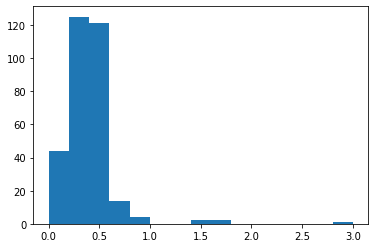

In [63]:
plt.hist(cers_conv_2,bins=15)

In [125]:
print('With ASRF:',mannwhitneyu(cers_s2s_2,cers_asrf_2))
# print('With Conv:',mannwhitneyu(cers_s2s_2,cers_conv_2))
# print('With RF:',mannwhitneyu(cers_s2s_2,cers_rf_2))

With ASRF: MannwhitneyuResult(statistic=2072.0, pvalue=0.6311231268560175)


In [144]:
len(fdrs_s2s)

250

In [145]:
np.std(fdrs_s2s)

0.01197514061498299

In [161]:
np.mean(fdrs_s2s[:100])

0.16648084557798193

In [162]:
np.mean(fdrs_asrf[:100])

0.15715535725769714

In [160]:
np.std(fdrs_s2s[:100])

0.012021713439488128

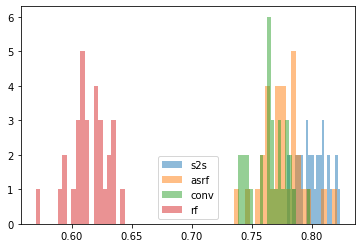

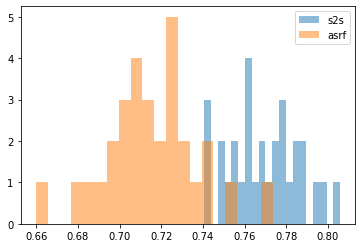

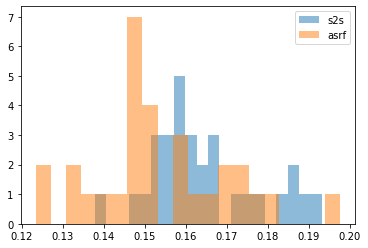

In [252]:
f1s_s2s = 2*(1-np.array(fdrs_s2s))*(np.array(tprs_s2s))/(1-np.array(fdrs_s2s)+np.array(tprs_s2s))
f1s_asrf = 2*(1-np.array(fdrs_asrf))*(np.array(tprs_asrf))/(1-np.array(fdrs_asrf)+np.array(tprs_asrf))
f1s_conv = 2*(1-np.array(fdrs_conv))*(np.array(tprs_conv))/(1-np.array(fdrs_conv)+np.array(tprs_conv))
f1s_rf = 2*(1-np.array(fdrs_rf))*(np.array(tprs_rf))/(1-np.array(fdrs_rf)+np.array(tprs_rf))
plt.hist(f1s_s2s,bins=20,label = 's2s',alpha = 0.5)
plt.hist(f1s_asrf,bins=20,label = 'asrf',alpha = 0.5)
plt.hist(f1s_conv,bins=20,label = 'conv',alpha = 0.5)
plt.hist(f1s_rf,bins=20,label = 'rf',alpha = 0.5)
plt.legend()
plt.show()

plt.hist(tprs_s2s,bins=20,label = 's2s',alpha = 0.5)
plt.hist(tprs_asrf,bins=20,label = 'asrf',alpha = 0.5)
plt.legend()
plt.show()

plt.hist(fdrs_s2s,bins=20,label = 's2s',alpha = 0.5)
plt.hist(fdrs_asrf,bins=20,label = 'asrf',alpha = 0.5)
plt.legend()
plt.show()

# plt.hist(edits_s2s,bins=20,label = 's2s',alpha = 0.5)
# plt.hist(edits_asrf,bins=20,label = 'asrf',alpha = 0.5)
# plt.legend()
# plt.show()

In [253]:
# wilcoxon(fdrs_s2s, fdrs_asrf)
# mannwhitneyu(fdrs_s2s,fdrs_asrf)
# ttest_ind(tprs_s2s,tprs_asrf,equal_var=False)
print('F1 With ASRF:',ttest_ind(f1s_s2s,f1s_asrf,equal_var=True))
print('F1 With Conv:',ttest_ind(f1s_s2s,f1s_conv,equal_var=True))
print('F1 With RF:',ttest_ind(f1s_s2s,f1s_rf,equal_var=True))
print('-'*30)
print('TPR With ASRF:',ttest_ind(tprs_s2s,tprs_asrf,equal_var=True))
print('TPR With Conv:',ttest_ind(tprs_s2s,tprs_conv,equal_var=True))
print('TPR With RF:',ttest_ind(tprs_s2s,tprs_rf,equal_var=True))
print('-'*30)
print('FDR With ASRF:',ttest_ind(fdrs_s2s,fdrs_asrf,equal_var=True))
print('FDR With Conv:',ttest_ind(fdrs_s2s,fdrs_conv,equal_var=True))
print('FDR With RF:',ttest_ind(fdrs_s2s,fdrs_rf,equal_var=True))


F1 With ASRF: Ttest_indResult(statistic=6.630443066985722, pvalue=1.2205257061723129e-08)
F1 With Conv: Ttest_indResult(statistic=10.29754936897602, pvalue=1.035438179385748e-14)
F1 With RF: Ttest_indResult(statistic=51.795630583749876, pvalue=2.9098414404580914e-50)
------------------------------
TPR With ASRF: Ttest_indResult(statistic=10.235367154734005, pvalue=1.3014372380870599e-14)
TPR With Conv: Ttest_indResult(statistic=8.164028349619441, pvalue=3.2538980512243276e-11)
TPR With RF: Ttest_indResult(statistic=49.15964205438505, pvalue=5.632988304939797e-49)
------------------------------
FDR With ASRF: Ttest_indResult(statistic=2.656189474714589, pvalue=0.010189121368027835)
FDR With Conv: Ttest_indResult(statistic=-7.48999657312394, pvalue=4.399898256314436e-10)
FDR With RF: Ttest_indResult(statistic=-10.242158529718402, pvalue=1.2693139761364376e-14)


In [177]:
print('F1 With ASRF:',ztest(f1s_s2s,f1s_asrf,))
print('F1 With Conv:',ztest(f1s_s2s,f1s_conv))
print('F1 With RF:',ztest(f1s_s2s,f1s_rf))
print('-'*30)
print('TPR With ASRF:',ztest(tprs_s2s,tprs_asrf))
print('TPR With Conv:',ztest(tprs_s2s,tprs_conv))
print('TPR With RF:',ztest(tprs_s2s,tprs_rf))
print('-'*30)
print('FDR With ASRF:',ztest(fdrs_s2s,fdrs_asrf))
print('FDR With Conv:',ztest(fdrs_s2s,fdrs_conv))
print('FDR With RF:',ztest(fdrs_s2s,fdrs_rf))


F1 With ASRF: (11.964974180689527, 5.421445047669556e-33)
F1 With Conv: (17.356466471510302, 1.7624204448500706e-67)
F1 With RF: (82.147171959472, 0.0)
------------------------------
TPR With ASRF: (18.62253065378336, 2.11002888836366e-77)
TPR With Conv: (13.074519992630908, 4.604613517942082e-39)
TPR With RF: (87.97021252905238, 0.0)
------------------------------
FDR With ASRF: (4.235273420203218, 2.2827377640028017e-05)
FDR With Conv: (-13.37163604085848, 8.857103639286884e-41)
FDR With RF: (-17.916854547654594, 8.711672565839023e-72)


In [57]:
f1_dict = {'s2s':f1s_s2s,'asrf':f1s_asrf,'conv':f1s_conv,'rf':f1s_rf}
tpr_dict = {'s2s':tprs_s2s,'asrf':tprs_asrf,'conv':tprs_conv,'rf':tprs_rf}
fdr_dict = {'s2s':fdrs_s2s,'asrf':fdrs_asrf,'conv':fdrs_conv,'rf':fdrs_rf}
complete_dict = {'f1':f1_dict,'tpr':tpr_dict,'fdr':fdr_dict}
pickling(complete_dict,'complete_bootstrap_data.p')

In [95]:
fdrs_asrf

[0.16797337828009481,
 0.14876102498348737,
 0.15778661072817218,
 0.15102681316189756,
 0.1494583423351955,
 0.15913953192276506,
 0.15395420713985827,
 0.14987543990021213,
 0.1553939337767143,
 0.14619209899116042,
 0.15384888003327374,
 0.16831205931160484,
 0.15507101815865254,
 0.16196911057673355,
 0.1631066778188617,
 0.15801998554160282,
 0.17219985600387894,
 0.14637542980860171,
 0.15543864904384774,
 0.1632471540430957,
 0.16583449805952072,
 0.14818457598664514,
 0.15591106013281425,
 0.16611734148449034,
 0.16565026924983975,
 0.15520671046001794,
 0.1478116979057992,
 0.15661964765364003,
 0.1602794695037853,
 0.1473110834913909,
 0.16161602712818832,
 0.15157658640270888,
 0.16496227816437217,
 0.13986770032491888,
 0.16366829584567652,
 0.15429455874503165,
 0.15304916138909272,
 0.15472585579036177,
 0.1561759586820308,
 0.15123248881682372,
 0.16493239775648774,
 0.15189032827748195,
 0.15901147133269625,
 0.15370715353505662,
 0.14936945574252813,
 0.144677023293126

In [78]:
# asrf (with smoothing window and frame-wise acc)
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.14469589204247874(0.1314137028782812,0.15685866757923864)
CI for tpr = 0.7415810050758345(0.7209748793627603,0.7617063584718882)
CI for cer = 0.31691117184026246(0.29561089798340745,0.3379986363330851)
CI for edit = 68.2814454894111(66.81957921121443,69.85065680523947)


In [47]:
# asrf (with boundary and frame-wise acc)
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.17128233149824312(0.1557308756362643,0.18484831666284596)
CI for tpr = 0.7472257344529144(0.7266921226435558,0.7694726415819522)
CI for cer = 0.32844816557828016(0.3089974310041223,0.34848868847546133)
CI for edit = 68.2375134545936(66.68519841480824,69.87309379304725)


In [70]:
# asrf (only and frame-wise acc)
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.22866879153648834(0.2071533759306419,0.24880539557761888)
CI for tpr = 0.7852233992755933(0.7657182379239198,0.8061948311980034)
CI for cer = 0.37243538951246447(0.33579577992714754,0.4056672406934091)
CI for edit = 66.89860657351464(65.01054126758547,68.79777866900183)


In [133]:
# asrf (with smoothing window)
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.16258284907215007(0.14908822697113155,0.1743747702120412)
CI for tpr = 0.7585515185281689(0.7370147510107067,0.7795423312743037)
CI for cer = 0.3168734551630503(0.29712651990553457,0.33824587168106324)
CI for edit = 68.80035015169007(67.29164424538018,70.26805534946962)


In [137]:
# asrf (with boundary)
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.2189577078536892(0.20494029426168583,0.2334502045414841)
CI for tpr = 0.784227819026173(0.7634617256065898,0.8035015795959471)
CI for cer = 0.3489448513703928(0.3260252159108072,0.3720986339763679)
CI for edit = 67.88674041426233(66.32297126825456,69.49308526954415)


In [128]:
# asrf (only)
fdrs, tprs, cers, edits = bootstrap_df(df)

CI for fdr = 0.20083314171123498(0.18623222035952547,0.21596351172513129)
CI for tpr = 0.7903682065567958(0.7697727491115196,0.8120290602782259)
CI for cer = 0.3302782710272651(0.3071598393919245,0.354878721599111)
CI for edit = 68.96545612584666(67.33141227513858,70.51435021582996)


In [259]:
sum_cl = 0
sum_l = 0
for c,l in zip(all_cers,all_gt_lens):
    sum_cl += c*l
    sum_l += l
print(sum_cl/sum_l)

0.39189445709946846


In [248]:
non_refined_preds[0].shape

(2220,)

In [249]:
all_gts[0].shape

(2220,)

# Plot confusion matrices

Confusion matrix, without normalization
[[51.47  0.71  3.04  2.99  1.95]
 [ 9.64 32.32  5.86  6.75  2.08]
 [ 0.62  0.96 61.33  0.12  4.31]
 [ 3.03  1.12  1.07 43.84  3.73]
 [ 1.38  1.45  7.18  1.45 54.42]]


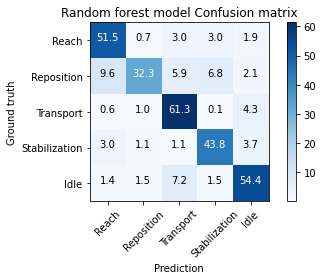

In [315]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f'
#    fmt = '.1f' if normalize else 'd'
    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Ground truth')
    plt.xlabel('Prediction')
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=1000,bbox_inches='tight')


classNames = ['Reach','Reposition','Transport','Stabilization','Idle']
fig = plt.figure()
confusionMatrixSubs = np.array([[0.75800,0.01894,0.00673,0.01936,0.03241],[0.00755,0.81590,0.00875,0.01710,0.01988],\
                               [0.00307,0.02560,0.78955,0.02151,0.01690],[0.02736,0.06559,0.01972,0.51590,0.02052],\
                               [0.02755,0.04642,0.01168,0.00749,0.70470]])
confusionMatrixSubs = np.array([[0.73123,0.01346,0.01088,0.02486,0.05386],[0.01449,0.73882,0.01278,0.03196,0.03451],\
                               [0.00569,0.02047,0.80728,0.04946,0.01649],[0.01960,0.04206,0.03185,0.59167,0.02287],\
                               [0.04271,0.01995,0.01278,0.00810,0.77057]])
confusionMatrixSubs = np.array([[0.5442,0.0138,0.0145,0.0145,0.0718],[0.0195,0.5147,0.0071,0.0299,0.0304],\
                               [0.0208,0.0964,0.3232,0.0675,0.0586],[0.0373,0.0303,0.0112,0.4384,0.0107],\
                               [0.0431,0.0062,0.0096,0.0012,0.6133]])
confusionMatrixSubs = np.roll(confusionMatrixSubs,-1,0)
confusionMatrixSubs = np.roll(confusionMatrixSubs,-1,1)
confusionMatrixSubs[2:4,:] = np.roll(confusionMatrixSubs[2:4,:],-1,0)
confusionMatrixSubs[:,2:4] = np.roll(confusionMatrixSubs[:,2:4],-1,1)
plot_confusion_matrix(confusionMatrixSubs*100, classes=classNames,normalize=False, title='Random forest model Confusion matrix')

In [316]:
data_dir = '/scratch/ark576/HAR-oat-data-july-2020/HAR-data-processed-2/'

In [317]:
import os

In [326]:
all_csvs = os.listdir(data_dir)
mapping = {'rest':0,'idle':0,'reach':1,'reposition':2,'retract':2,'stabilize':3,'transport':4}

In [346]:
train_set = folds_dict['fold_1']+folds_dict['fold_2']+folds_dict['fold_3']
val_set = folds_dict['fold_4']
test_set = ['s4','s17','s26','s37','s39','s42','s44','s47']

In [349]:
from itertools import groupby
from collections import Counter
from tqdm import tqdm

pbar = tqdm(total=len(all_csvs)) # Init pbar
all_train_prim = []
all_val_prim = []
all_test_prim = []
for f in all_csvs:
    pbar.update(n=1)
    sub = f.split('_')[0]
    if sub in train_set:
        class_lab = np.array(pd.read_csv(data_dir+f)['class'])
        all_train_prim += [mapping[k] for k,g in groupby(class_lab) if k!=0]
    elif sub in val_set:
        class_lab = np.array(pd.read_csv(data_dir+f)['class'])
        all_val_prim += [mapping[k] for k,g in groupby(class_lab) if k!=0]
    elif sub in test_set:
        class_lab = np.array(pd.read_csv(data_dir+f)['class'])
        all_test_prim += [mapping[k] for k,g in groupby(class_lab) if k!=0]
all_train_prim = Counter(all_train_prim)
all_val_prim = Counter(all_val_prim)
all_test_prim = Counter(all_test_prim)

print('Train set')
print(all_train_prim)

print('Val set')
print(all_val_prim)

print('Test set')
print(all_test_prim)


  2%|▏         | 45/2003 [00:09<06:38,  4.91it/s]

 29%|██▊       | 574/2003 [01:04<03:14,  7.33it/s]


 55%|█████▌    | 1107/2003 [02:07<01:50,  8.13it/s]


 82%|████████▏ | 1651/2003 [03:13<00:40,  8.70it/s]


100%|██████████| 2003/2003 [03:56<00:00,  5.55it/s]

Train set
Counter({4: 9503, 3: 8791, 1: 7281, 0: 7267, 2: 5775})
Val set
Counter({4: 2968, 3: 2654, 0: 2649, 1: 2559, 2: 2264})
Test set
Counter({4: 3339, 1: 2515, 3: 2485, 0: 2386, 2: 1956})


# Ensemble model

In [40]:
import torch
import collections
from torch.autograd import Variable
import torch.nn.functional as F

In [2]:
import torch.nn as nn
class pBLSTMLayer(nn.Module):
    def __init__(self,input_feature_dim,hidden_dim,rnn_unit='LSTM',dropout_rate=0.0):
        super(pBLSTMLayer, self).__init__()
        self.rnn_unit = getattr(nn,rnn_unit.upper())

        # feature dimension will be doubled since time resolution reduction
        self.BLSTM = self.rnn_unit(input_feature_dim*2,hidden_dim,1, bidirectional=True, 
                                   dropout=dropout_rate,batch_first=True)
    
    def forward(self,input_x):
        batch_size = input_x.size(0)
        timestep = input_x.size(1)
        feature_dim = input_x.size(2)
        # Reduce time resolution
        input_x = input_x.contiguous().view(batch_size,int(timestep/2),feature_dim*2)
        # Bidirectional RNN
        output,hidden = self.BLSTM(input_x)
        return output,hidden

# Listener is a pBLSTM stacking 3 layers to reduce time resolution 8 times
# Input shape should be [# of sample, timestep, features]
class Listener(nn.Module):
    def __init__(self, input_feature_dim, listener_hidden_dim, listener_layer, rnn_unit, use_gpu, dropout_rate=0.0,only_encoder=False, **kwargs):
        super(Listener, self).__init__()
        # Listener RNN layer
        self.listener_layer = listener_layer
        assert self.listener_layer>=1,'Listener should have at least 1 layer'
        
        self.pLSTM_layer0 = pBLSTMLayer(input_feature_dim,listener_hidden_dim, rnn_unit=rnn_unit, dropout_rate=dropout_rate)

        for i in range(1,self.listener_layer):
            setattr(self, 'pLSTM_layer'+str(i), pBLSTMLayer(listener_hidden_dim*2,listener_hidden_dim, rnn_unit=rnn_unit, dropout_rate=dropout_rate))

        self.use_gpu = use_gpu
        self.only_encoder = only_encoder
        if self.only_encoder:
            self.fc = nn.Linear(listener_hidden_dim*2,5)
        if self.use_gpu:
            self = self.cuda()

    def forward(self,input_x):
        output,_  = self.pLSTM_layer0(input_x)
        for i in range(1,self.listener_layer):
            output, _ = getattr(self,'pLSTM_layer'+str(i))(output)
        
        if self.only_encoder:
            output1 = self.fc(output)
            
        return [output,output1]

In [41]:
def dot_attention(comp_decoder_state, comp_listener_feature):
    energy = torch.bmm(comp_decoder_state,comp_listener_feature.transpose(1, 2)).squeeze(dim=1)
    attention_score = [F.softmax(energy,dim=-1)]
    context = torch.sum(comp_listener_feature*attention_score[0].unsqueeze(2).repeat(1,1,comp_listener_feature.size(2)),dim=1)
    return attention_score, context

In [42]:
def replace_name_keys(sp_sd, num):
    sp_sd['rnn_layer'+num+'.weight_ih_l0'] = sp_sd.pop('rnn_layer.weight_ih_l0')
    sp_sd['rnn_layer'+num+'.weight_hh_l0'] = sp_sd.pop('rnn_layer.weight_hh_l0')
    sp_sd['rnn_layer'+num+'.bias_ih_l0'] = sp_sd.pop('rnn_layer.bias_ih_l0')
    sp_sd['rnn_layer'+num+'.bias_hh_l0'] = sp_sd.pop('rnn_layer.bias_hh_l0')
    sp_sd['character_distribution'+num+'.weight'] = sp_sd.pop('character_distribution.weight')
    sp_sd['character_distribution'+num+'.bias'] = sp_sd.pop('character_distribution.bias')
    return sp_sd

In [92]:
class Ensemble_Speller(nn.Module):
    def __init__(self, output_class_dim,  speller_hidden_dim, rnn_unit, speller_rnn_layer, use_gpu, max_label_len,
                 use_mlp_in_attention, mlp_dim_in_attention, mlp_activate_in_attention,
                 multi_head, decode_mode,use_attention,listener_type, **kwargs):
        super(Ensemble_Speller, self).__init__()
        self.rnn_unit = getattr(nn,rnn_unit.upper())
        self.max_label_len = max_label_len
        self.decode_mode = decode_mode
        self.listener_type = listener_type
        self.use_gpu = use_gpu
        self.float_type = torch.torch.cuda.FloatTensor if use_gpu else torch.FloatTensor
        self.label_dim = output_class_dim
        self.rnn_layer1 = self.rnn_unit(output_class_dim+speller_hidden_dim,speller_hidden_dim,num_layers=speller_rnn_layer,batch_first=True)
        self.rnn_layer2 = self.rnn_unit(output_class_dim+speller_hidden_dim,speller_hidden_dim,num_layers=speller_rnn_layer,batch_first=True)
        self.rnn_layer3 = self.rnn_unit(output_class_dim+speller_hidden_dim,speller_hidden_dim,num_layers=speller_rnn_layer,batch_first=True)
        self.rnn_layer4 = self.rnn_unit(output_class_dim+speller_hidden_dim,speller_hidden_dim,num_layers=speller_rnn_layer,batch_first=True)
        self.use_attention = use_attention
        if self.use_attention:
            self.attention = dot_attention
        self.character_distribution1 = nn.Linear(speller_hidden_dim*2,output_class_dim)
        self.character_distribution2 = nn.Linear(speller_hidden_dim*2,output_class_dim)
        self.character_distribution3 = nn.Linear(speller_hidden_dim*2,output_class_dim)
        self.character_distribution4 = nn.Linear(speller_hidden_dim*2,output_class_dim)
        self.softmax = nn.LogSoftmax(dim=-1)
        if self.use_gpu:
            self = self.cuda()

    # Stepwise operation of each sequence
    def forward_step(self,input_word, last_hidden_state,listener_feature,rl,cd):
        rnn_output, hidden_state = rl(input_word,last_hidden_state)
        if self.use_attention:
            attention_score, context = self.attention(rnn_output,listener_feature)
            concat_feature = torch.cat([rnn_output.squeeze(dim=1),context],dim=-1)
            raw_pred = self.softmax(cd(concat_feature))

            return raw_pred, hidden_state, context, attention_score
        else:
            context = torch.mean(listener_feature, dim = 1)
            concat_feature = torch.cat([rnn_output.squeeze(dim=1),context],dim=-1)
            raw_pred = self.softmax(cd(concat_feature))
            return raw_pred, hidden_state,  context, None

    def forward(self, listener_feature1,listener_feature2,listener_feature3,listener_feature4, ground_truth=None,\
                teacher_force_rate = 0.9, previous_pred = None):
        if ground_truth is None:
            teacher_force_rate = 0
        teacher_force = True if np.random.random_sample() < teacher_force_rate else False

        batch_size = listener_feature1.size()[0]
        
        if previous_pred is not None:
#             print("prev pred:",previous_pred.shape)
            output_word = self.float_type(previous_pred)
        else:
            output_word = CreateOnehotVariable(self.float_type(np.zeros((batch_size,1))),self.label_dim)
        
        if self.use_gpu:
            output_word = output_word.cuda()
        
        
        rnn_input1 = torch.cat([output_word,listener_feature1[:,0:1,:]],dim=-1)
        rnn_input2 = torch.cat([output_word,listener_feature2[:,0:1,:]],dim=-1)
        rnn_input3 = torch.cat([output_word,listener_feature3[:,0:1,:]],dim=-1)
        rnn_input4 = torch.cat([output_word,listener_feature4[:,0:1,:]],dim=-1)

        hidden_state1 = None
        hidden_state2 = None
        hidden_state3 = None
        hidden_state4 = None
        
        raw_pred_seq = []
        output_seq = []
        attention_record = []

        if (ground_truth is None) or (not teacher_force):
            max_step = self.max_label_len
        else:
            max_step = ground_truth.size()[1]

        for step in range(max_step):
            raw_pred1, hidden_state1, context1, attention_score1 = self.forward_step(rnn_input1, hidden_state1,\
                                                                                     listener_feature1,self.rnn_layer1,\
                                                                                     self.character_distribution1)
            raw_pred2, hidden_state2, context2, attention_score2 = self.forward_step(rnn_input2, hidden_state2,\
                                                                                     listener_feature2,self.rnn_layer2,\
                                                                                     self.character_distribution2)
            raw_pred3, hidden_state3, context3, attention_score3 = self.forward_step(rnn_input3, hidden_state3,\
                                                                                     listener_feature3,self.rnn_layer3,\
                                                                                     self.character_distribution3)
            raw_pred4, hidden_state4, context4, attention_score4 = self.forward_step(rnn_input4, hidden_state4,\
                                                                                     listener_feature4,self.rnn_layer4,\
                                                                                     self.character_distribution4)
            all_preds = torch.cat([raw_pred1,raw_pred2,raw_pred3,raw_pred4],dim=0)
            prob_preds = torch.exp(all_preds)
            average_prob = torch.mean(prob_preds,axis = 0).unsqueeze(0)
            average_raw_pred = torch.log(average_prob)
            raw_pred_seq.append(average_raw_pred)
            attention_record.append(None)
            # Teacher force - use ground truth as next step's input
            if teacher_force:
                output_word = ground_truth[:,step:step+1,:].type(self.float_type)
            else:
                # Case 0. raw output as input
                if self.decode_mode == 0:
                    output_word = average_raw_pred.unsqueeze(1)
                # Case 1. Pick character with max probability
                elif self.decode_mode == 1:
                    output_word = torch.zeros_like(average_raw_pred)
                    for idx,i in enumerate(average_raw_pred.topk(1)[1]):
                        output_word[idx,int(i)] = 1
                    output_word = output_word.unsqueeze(1)             
                # Case 2. Sample categotical label from raw prediction
                else:
                    sampled_word = Categorical(average_raw_pred).sample()
                    output_word = torch.zeros_like(average_raw_pred)
                    for idx,i in enumerate(sampled_word):
                        output_word[idx,int(i)] = 1
                    output_word = output_word.unsqueeze(1)
                
            rnn_input1 = torch.cat([output_word,context1.unsqueeze(1)],dim=-1)
            rnn_input2 = torch.cat([output_word,context2.unsqueeze(1)],dim=-1)
            rnn_input3 = torch.cat([output_word,context3.unsqueeze(1)],dim=-1)
            rnn_input4 = torch.cat([output_word,context4.unsqueeze(1)],dim=-1)

        return raw_pred_seq,attention_record

In [44]:
def CreateOnehotVariable( input_x, encoding_dim=63):
    if type(input_x) is Variable:
        input_x = input_x.data 
    input_type = type(input_x)
    batch_size = input_x.size(0)
    time_steps = input_x.size(1)
    input_x = input_x.unsqueeze(2).type(torch.LongTensor)
    onehot_x = Variable(torch.LongTensor(batch_size, time_steps, encoding_dim).zero_().scatter_(-1,input_x,1)).type(input_type)
    
    return onehot_x

In [45]:
hparams = unpickling('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_1/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_hparams_dict.p')

In [46]:
hparams['use_gpu']=False

In [47]:
sp1_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_1/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_speller.pth',map_location=torch.device('cpu'))
sp2_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_2/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_speller.pth',map_location=torch.device('cpu'))
sp3_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_3/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_speller.pth',map_location=torch.device('cpu'))
sp4_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_4/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_speller.pth',map_location=torch.device('cpu'))

In [48]:
lt1_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_1/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_listener.pth',map_location=torch.device('cpu'))
lt2_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_2/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_listener.pth',map_location=torch.device('cpu'))
lt3_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_3/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_listener.pth',map_location=torch.device('cpu'))
lt4_sd = torch.load('/scratch/ark576/seq2seq_model_har/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400/fold_4/2pred_gru_rl3_1024_dlrs2_subset_hc_0.6_add_syn_data_pc_add_aug_new_label_wcontext_ft_win_400_listener.pth',map_location=torch.device('cpu'))

In [97]:
list1 = Listener(**hparams)
list1.load_state_dict(lt1_sd)
list2 = Listener(**hparams)
list2.load_state_dict(lt2_sd)
list3 = Listener(**hparams)
list3.load_state_dict(lt3_sd)
list4 = Listener(**hparams)
list4.load_state_dict(lt4_sd)

/home/ark576/.conda/envs/sensors/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


<All keys matched successfully>

In [98]:
x = torch.rand(1,600,77)

In [99]:
out1 = list1(x)[1]
out2 = list2(x)[1]
out3 = list3(x)[1]
out4 = list4(x)[1]

In [111]:
out1.shape

torch.Size([1, 75, 5])

In [112]:
torch.mean(torch.cat([out1[:,:,:,None],out2[:,:,:,None],out3[:,:,:,None],out4[:,:,:,None]],dim=3),dim = (3)).shape

torch.Size([1, 75, 5])

In [52]:
sp1_sd = replace_name_keys(sp1_sd,'1')
sp2_sd = replace_name_keys(sp2_sd,'2')
sp3_sd = replace_name_keys(sp3_sd,'3')
sp4_sd = replace_name_keys(sp4_sd,'4')

In [93]:
sp = Ensemble_Speller(**hparams)

In [94]:
combined_sp_dicts = collections.OrderedDict(list(sp1_sd.items())+list(sp2_sd.items())+list(sp3_sd.items())+list(sp4_sd.items()))
sp.load_state_dict(combined_sp_dicts)

<All keys matched successfully>

In [95]:
previous_pred = torch.Tensor([[1]])
previous_pred = CreateOnehotVariable(previous_pred,encoding_dim=7)
raw_pred_seq, att_scr = sp(out1,out2,out3,out4,previous_pred=previous_pred)

In [96]:
raw_pred_seq

[tensor([[-2.6218, -1.6120, -2.8128, -2.6923, -1.3713, -1.3947, -2.3187]],
        grad_fn=<LogBackward>),
 tensor([[-2.4714, -1.8256, -3.1300, -2.8237, -2.4445, -1.2098, -1.3232]],
        grad_fn=<LogBackward>),
 tensor([[-2.0176, -2.4652, -2.9576, -3.0036, -1.4872, -2.5601, -0.9750]],
        grad_fn=<LogBackward>),
 tensor([[-0.3990, -3.4058, -3.4484, -3.8708, -3.2420, -2.3653, -2.2059]],
        grad_fn=<LogBackward>),
 tensor([[-0.2406, -3.8089, -3.7269, -4.2090, -3.8056, -2.6445, -2.8220]],
        grad_fn=<LogBackward>),
 tensor([[-0.1881, -3.9766, -3.9066, -4.3828, -3.9878, -2.9236, -3.0391]],
        grad_fn=<LogBackward>),
 tensor([[-0.1678, -4.0551, -4.0230, -4.4593, -4.0575, -3.1063, -3.0865]],
        grad_fn=<LogBackward>),
 tensor([[-0.1582, -4.0994, -4.0976, -4.4967, -4.0858, -3.2418, -3.0778]],
        grad_fn=<LogBackward>),
 tensor([[-0.1523, -4.1315, -4.1467, -4.5198, -4.1047, -3.3447, -3.0642]],
        grad_fn=<LogBackward>),
 tensor([[-0.1477, -4.1575, -4.1818, 

In [5]:
df_rf = pd.read_csv('./rf_test_set_smooth_ws1_beta3.csv')

In [6]:
df_rf

,name,gt,pred,gt_len,pred_len,cer_value,sub,act,rep,cer*gt_len
0,S0044_feeding_5,0143134314313134343434343434343431341314132014...,41434343430304143410434343430242,68,32,0.602941,S0044,feeding,5,41.0
1,S0037_feeding_4,0131414341414143434134141434343134343434343434...,0143414143414040402,54,19,0.685185,S0037,feeding,4,37.0
2,S0004_brushing_3,020303434343434343202032020,0103030343043403020,27,19,0.407407,S0004,brushing,3,11.0
3,S0017_deodorant_4,0203431341341340343434343134343134320,01434340434342,37,14,0.621622,S0017,deodorant,4,23.0
4,S0042_feeding_3,0131431343431341420143134343434343434343434343...,0141434140343434303434120,71,25,0.661972,S0042,feeding,3,47.0
...,...,...,...,...,...,...,...,...,...,...
264,S0017_deodorant_3,0134134134141343141341343202,01434340,28,8,0.714286,S0017,deodorant,3,20.0
265,S0042_combing_1,014141420,01410,9,5,0.444444,S0042,combing,1,4.0
266,S0039_feeding_4,0134131343013434301343414343434343434302,0143434343430303034343430343430343034042,40,40,0.350000,S0039,feeding,4,14.0
267,S0039_brushing_5,0143202020202020202,03414343434343434343030404204,19,29,1.052632,S0039,brushing,5,20.0
